In [1]:
#import
%matplotlib inline 
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
dfnew = pd.read_csv("RWE Creek.csv")
dfnew 

,TURBINE_ID,TTimeStamp,Gen_RPM_Avg,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,...,HCnt_Avg_GrdOk,HCnt_Avg_TrbOk,HCnt_Avg_Run,HCnt_Avg_Gen1,HCnt_Avg_Gen2,HCnt_Avg_Yaw,HCnt_Avg_SrvOn,HCnt_Avg_AmbOk,HCnt_Avg_WindOk,Sys_Logs_FirstActAlarmNo
0,T001,2018-09-15 00:10:00.000,131.1,35,35,35,35,2.4,1.6,2.1,...,600,600,600,0,0,0,0,600,0,0
1,T001,2018-09-15 00:20:00.000,144.7,34,35,35,35,2.6,1.7,2.3,...,600,600,600,0,0,0,0,600,0,0
2,T001,2018-09-15 00:30:00.000,155.7,34,35,35,35,2.6,2.0,2.4,...,600,600,600,0,0,33,0,600,0,0
3,T001,2018-09-15 00:40:00.000,144.0,34,35,35,35,2.6,2.0,2.3,...,600,600,600,0,0,38,0,600,0,0
4,T001,2018-09-15 00:50:00.000,124.2,34,35,35,35,2.2,1.7,2.0,...,600,600,600,0,0,24,0,600,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157459,T013,2018-12-07 13:10:00.000,1060.1,48,70,71,71,8.1,5.3,6.8,...,600,600,600,600,0,0,0,600,600,0
157460,T013,2018-12-07 13:20:00.000,1060.0,48,70,71,71,8.9,5.7,6.8,...,600,600,600,600,0,25,0,600,600,0
157461,T013,2018-12-07 13:30:00.000,1044.3,48,70,72,71,8.4,5.3,6.7,...,600,600,600,600,0,0,0,600,600,0
157462,T013,2018-12-07 13:40:00.000,1031.1,48,70,71,71,8.2,4.7,6.4,...,600,600,600,600,0,0,0,600,600,0


In [3]:
# Check for missing values in each column
missing_values = dfnew.isna().sum()
print(missing_values)

TURBINE_ID                             0
TTimeStamp                             0
Gen_RPM_Avg                            0
Gen_Bear_Temp_Avg                      0
Gen_Phase1_Temp_Avg                    0
Gen_Phase2_Temp_Avg                    0
Gen_Phase3_Temp_Avg                    0
Amb_WindSpeed_Max                      0
Amb_WindSpeed_Min                      0
Amb_WindSpeed_Avg                      0
Amb_WindDir_Abs_Avg                    0
Amb_WindSpeed_Est_Avg                  0
Amb_Temp_Avg                           0
Blds_PitchAngle_Avg                    0
Blds_PitchAngle_Max                    0
Blds_PitchAngle_Min                    0
Nac_Direction_Avg                      0
Cont_VCP_ChokcoilTemp_Avg              0
Grd_Prod_Pwr_Avg                       0
Grd_Prod_Pwr_Min                       0
Grd_Prod_PsblePwr_Avg                  0
Grd_Sets_ActPwr_ReferenceValue10Min    0
Grd_Prod_Pwr_InternalDerateStat        0
Grd_Prod_Pwr_InternalDerateTime        0
HCnt_Avg_Tot    

In [4]:
dfnew['TTimeStamp'] = pd.to_datetime(dfnew['TTimeStamp'])
data_types = dfnew.dtypes
print(data_types)

TURBINE_ID                                     object
TTimeStamp                             datetime64[ns]
Gen_RPM_Avg                                   float64
Gen_Bear_Temp_Avg                               int64
Gen_Phase1_Temp_Avg                             int64
Gen_Phase2_Temp_Avg                             int64
Gen_Phase3_Temp_Avg                             int64
Amb_WindSpeed_Max                             float64
Amb_WindSpeed_Min                             float64
Amb_WindSpeed_Avg                             float64
Amb_WindDir_Abs_Avg                           float64
Amb_WindSpeed_Est_Avg                         float64
Amb_Temp_Avg                                    int64
Blds_PitchAngle_Avg                           float64
Blds_PitchAngle_Max                           float64
Blds_PitchAngle_Min                           float64
Nac_Direction_Avg                             float64
Cont_VCP_ChokcoilTemp_Avg                       int64
Grd_Prod_Pwr_Avg            

In [5]:
#df['TURBINE_ID'] = pd.to_numeric(df['TURBINE_ID'], errors='coerce')
#df['TURBINE_ID'] = df['TURBINE_ID'].astype(str)
#data_types = df.dtypes
#print(data_types)

In [6]:
turbine_count = dfnew['TURBINE_ID'].value_counts()
print(turbine_count)
#total of 13 turbines

T006    12949
T009    12915
T004    11965
T010    11965
T012    11965
T001    11964
T002    11964
T003    11964
T005    11964
T011    11964
T013    11964
T007    11961
T008    11960
Name: TURBINE_ID, dtype: int64


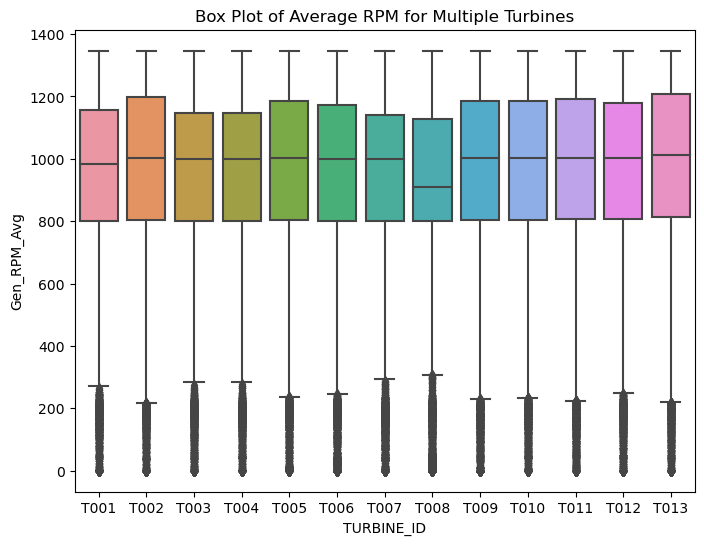

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='TURBINE_ID', y='Gen_RPM_Avg', data=dfnew)
plt.title('Box Plot of Average RPM for Multiple Turbines')
plt.show()

(array([ 7177.,  6534.,  1019.,  1315.,  1583., 27338., 27253., 29813.,
        21568., 33864.]),
 array([   0.  ,  134.64,  269.28,  403.92,  538.56,  673.2 ,  807.84,
         942.48, 1077.12, 1211.76, 1346.4 ]),
 <BarContainer object of 10 artists>)

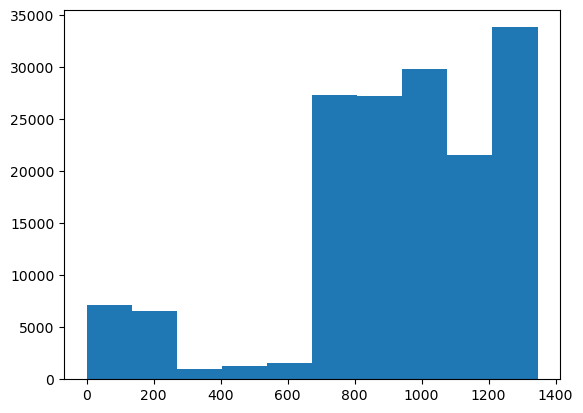

In [9]:
x = dfnew['Gen_RPM_Avg']
plt.hist(x)

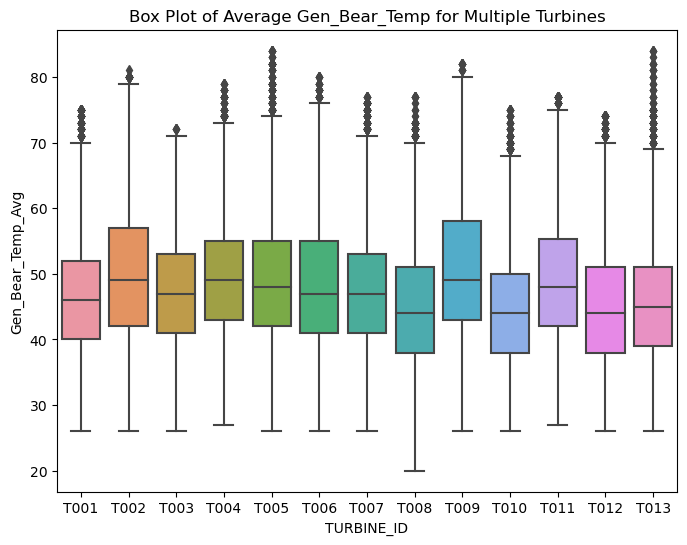

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='TURBINE_ID', y='Gen_Bear_Temp_Avg', data=dfnew)
plt.title('Box Plot of Average Gen_Bear_Temp for Multiple Turbines')
plt.show()

(array([  267.,  6238., 26409., 38136., 36645., 28326., 12531.,  6444.,
         2182.,   286.]),
 array([20. , 26.4, 32.8, 39.2, 45.6, 52. , 58.4, 64.8, 71.2, 77.6, 84. ]),
 <BarContainer object of 10 artists>)

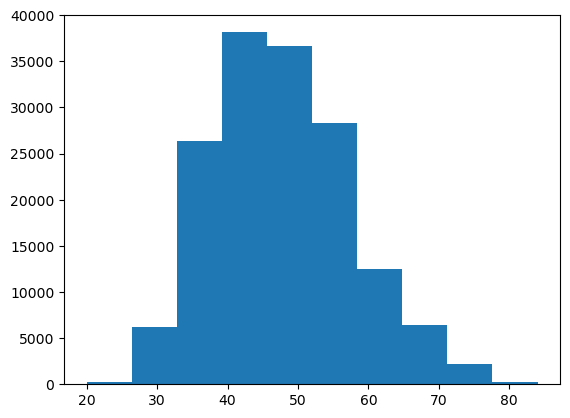

In [12]:
x = dfnew['Gen_Bear_Temp_Avg']
plt.hist(x)

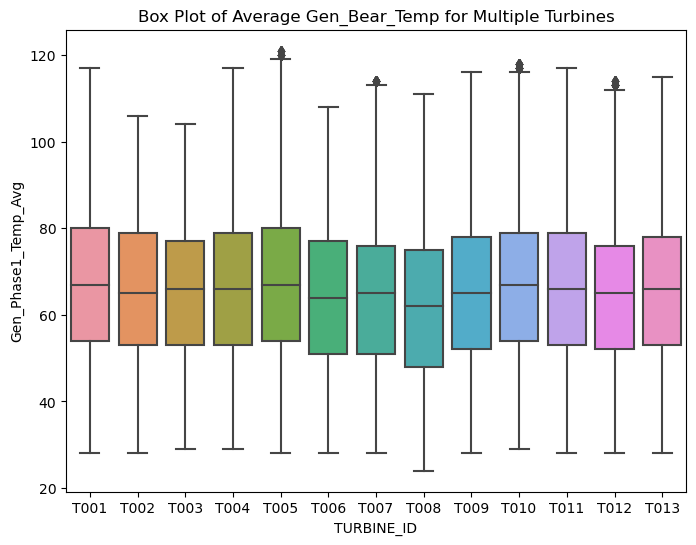

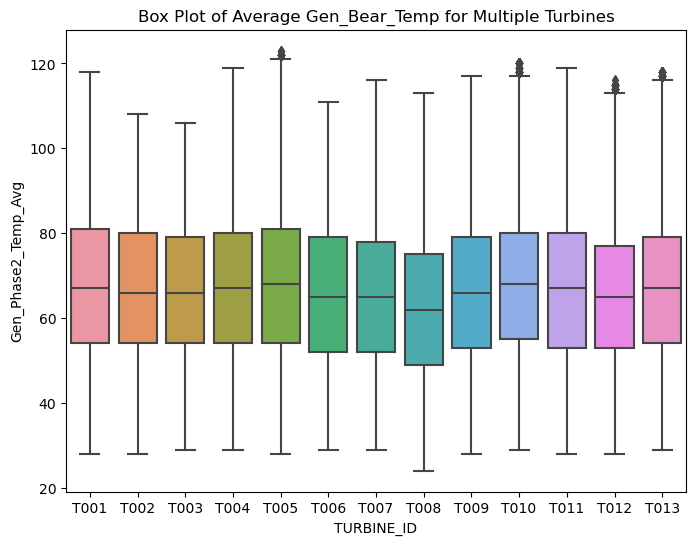

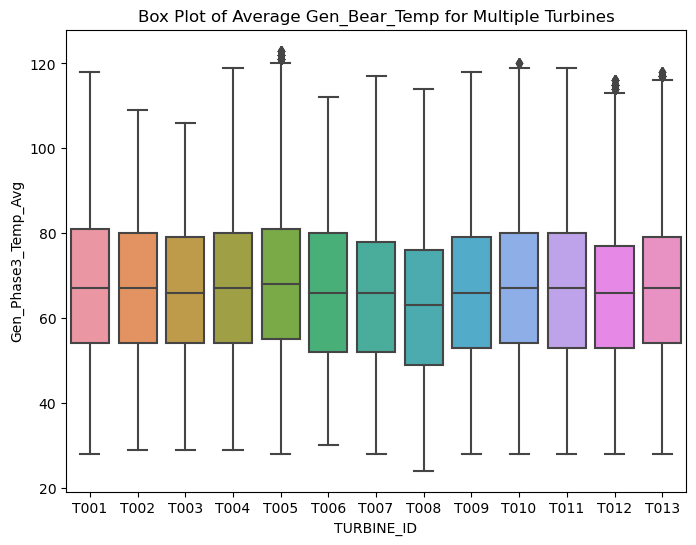

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='TURBINE_ID', y='Gen_Phase1_Temp_Avg', data=dfnew)
plt.title('Box Plot of Average Gen_Bear_Temp for Multiple Turbines')

plt.figure(figsize=(8, 6))
sns.boxplot(x='TURBINE_ID', y='Gen_Phase2_Temp_Avg', data=dfnew)
plt.title('Box Plot of Average Gen_Bear_Temp for Multiple Turbines')

plt.figure(figsize=(8, 6))
sns.boxplot(x='TURBINE_ID', y='Gen_Phase3_Temp_Avg', data=dfnew)
plt.title('Box Plot of Average Gen_Bear_Temp for Multiple Turbines')

plt.show()

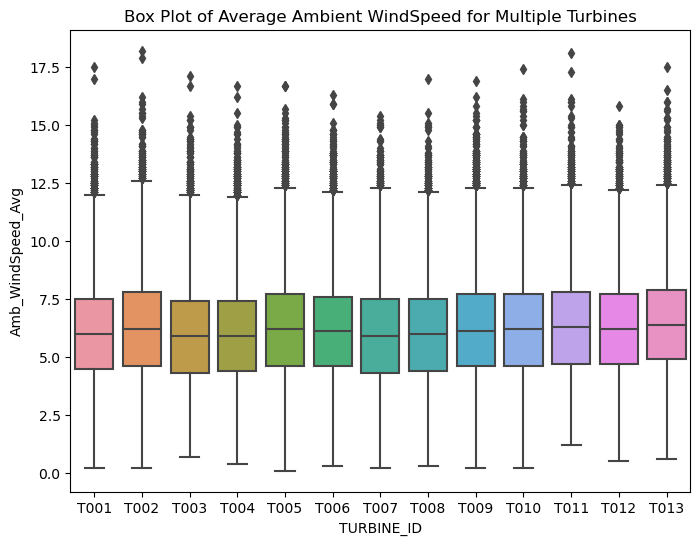

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='TURBINE_ID', y='Amb_WindSpeed_Avg', data=dfnew)
plt.title('Box Plot of Average Ambient WindSpeed for Multiple Turbines')
plt.show()

In [16]:
# Resample data to daily averages
#over 84 days 
daily_data = dfnew.resample('D', on='TTimeStamp').mean()
daily_data

,Gen_RPM_Avg,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,Amb_WindDir_Abs_Avg,Amb_WindSpeed_Est_Avg,...,HCnt_Avg_GrdOk,HCnt_Avg_TrbOk,HCnt_Avg_Run,HCnt_Avg_Gen1,HCnt_Avg_Gen2,HCnt_Avg_Yaw,HCnt_Avg_SrvOn,HCnt_Avg_AmbOk,HCnt_Avg_WindOk,Sys_Logs_FirstActAlarmNo
TTimeStamp,,,,,,,,,,,,,,,,,,,,,
2018-09-15,884.547391,47.248521,60.784293,61.488973,61.649274,6.808230,4.210167,5.517698,189.381657,5.560194,...,600.000000,593.848306,593.836471,193.564282,334.008607,15.522324,0.000000,600.000000,442.160301,32.533620
2018-09-16,826.786538,47.593483,60.755876,61.354701,61.492521,6.262714,3.785791,4.976870,155.567361,5.056303,...,600.000000,600.000000,600.000000,135.239316,395.638889,19.855769,0.000000,600.000000,436.679487,0.000000
2018-09-17,987.525801,52.053419,70.046474,70.742521,70.936432,7.608120,4.888301,6.238248,131.887393,6.252618,...,600.000000,600.000000,600.000000,288.924145,311.006410,15.727564,0.000000,600.000000,597.038996,0.000000
2018-09-18,904.369551,50.027778,64.761752,65.378739,65.575855,6.641774,4.045620,5.317254,131.242895,5.341934,...,600.000000,600.000000,600.000000,214.901709,355.928419,23.007479,0.000000,600.000000,455.036859,0.000000
2018-09-19,842.037286,47.645833,60.753205,61.344551,61.521902,6.109028,3.863301,4.965919,134.787874,4.995566,...,600.000000,600.000000,600.000000,127.627137,425.831731,15.457265,0.000000,600.000000,437.364316,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-03,967.429113,45.411859,63.093483,63.854167,64.069444,7.304754,4.473024,5.893803,65.608707,6.071421,...,600.000000,600.000000,600.000000,295.247863,297.204594,14.803419,0.000000,600.000000,527.119124,0.000000
2018-12-04,1158.539530,49.927885,75.005876,76.109509,76.341880,9.325534,5.888088,7.626603,38.915491,7.813248,...,595.118056,595.075321,594.020833,589.122329,4.742521,16.096688,4.882479,595.118056,598.592415,4.938034
2018-12-05,976.461218,42.438034,61.444444,62.243056,62.491453,7.375267,4.598878,6.015865,48.276015,6.137874,...,599.843483,599.399573,599.143162,347.548611,249.866453,11.794338,0.156517,599.843483,575.327457,10.632479


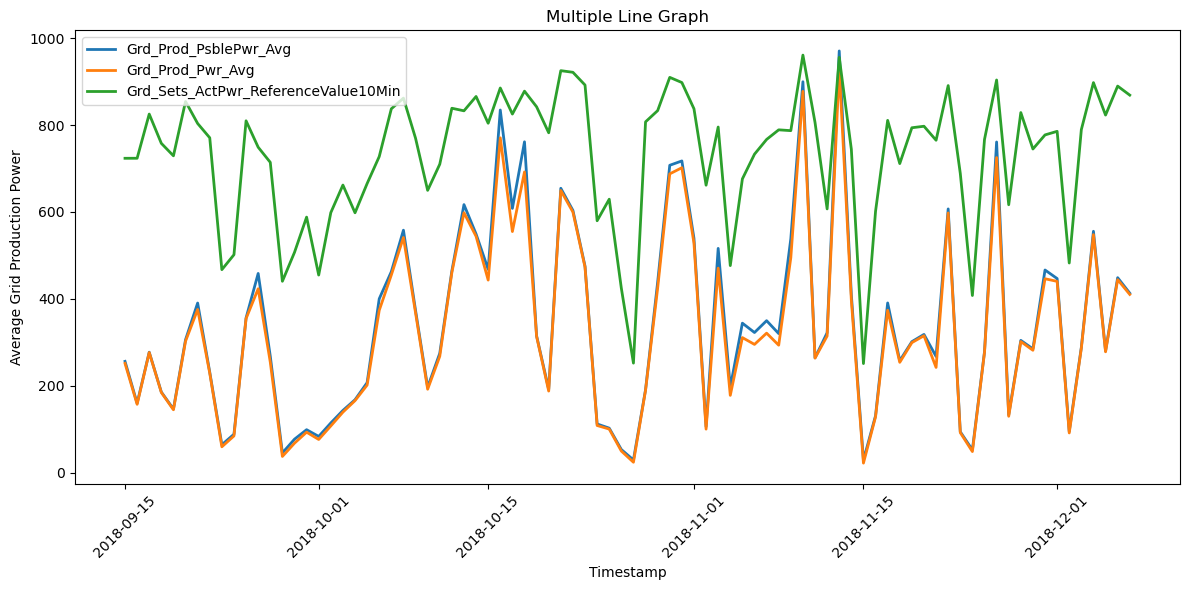

In [17]:
daily_data = daily_data.reset_index()
datay1 = daily_data['Grd_Prod_PsblePwr_Avg']
datay2 = daily_data['Grd_Prod_Pwr_Avg']
datay3 = daily_data['Grd_Sets_ActPwr_ReferenceValue10Min']
datax = daily_data['TTimeStamp']

plt.figure(figsize=(12, 6))
plt.plot(datax, datay1, label='Grd_Prod_PsblePwr_Avg', linewidth=2)
plt.plot(datax, datay2, label='Grd_Prod_Pwr_Avg', linewidth=2)
plt.plot(datax, datay3, label='Grd_Sets_ActPwr_ReferenceValue10Min', linewidth=2)

# Customize the plot
plt.xlabel('Timestamp')
plt.ylabel('Average Grid Production Power')
plt.title('Multiple Line Graph')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
alarm_count = dfnew['Sys_Logs_FirstActAlarmNo'].value_counts()
print(alarm_count)

0       154083
220       2023
309        574
3273       170
3024       153
598        125
3209        74
3272        54
900         50
5066        33
127         22
356         18
3634        18
3633        14
604          9
3298         7
4457         6
87           5
156          4
81           4
5001         4
326          4
315          2
3190         1
79           1
190          1
707          1
144          1
4604         1
159          1
102          1
Name: Sys_Logs_FirstActAlarmNo, dtype: int64


In [19]:
import pandas as pd

# Assuming you have a DataFrame named dfnew with a column 'AlarmCondition' that identifies alarms
# You may need to adjust the condition based on your specific data
dfnew['IsAlarm'] = dfnew['Sys_Logs_FirstActAlarmNo'].apply(lambda x: 1 if x == 'Alarm' else 0)
print(dfnew)

       TURBINE_ID          TTimeStamp  Gen_RPM_Avg  Gen_Bear_Temp_Avg  \
0            T001 2018-09-15 00:10:00        131.1                 35   
1            T001 2018-09-15 00:20:00        144.7                 34   
2            T001 2018-09-15 00:30:00        155.7                 34   
3            T001 2018-09-15 00:40:00        144.0                 34   
4            T001 2018-09-15 00:50:00        124.2                 34   
...           ...                 ...          ...                ...   
157459       T013 2018-12-07 13:10:00       1060.1                 48   
157460       T013 2018-12-07 13:20:00       1060.0                 48   
157461       T013 2018-12-07 13:30:00       1044.3                 48   
157462       T013 2018-12-07 13:40:00       1031.1                 48   
157463       T013 2018-12-07 13:50:00       1073.1                 48   

        Gen_Phase1_Temp_Avg  Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  \
0                        35                   35  

In [24]:
unique_values = dfnew['Sys_Logs_FirstActAlarmNo'].unique()
print(unique_values)


[   0 3634 5001 5066  220  900 3273  309  127  356 4457 3272 3209 4604
  598  102  156 3298   79 3024 3633 3190  604  326   81  190  707  144
   87  159  315]


In [28]:
dfnew['Sys_Logs_FirstActAlarmNo'] = dfnew['Sys_Logs_FirstActAlarmNo'].astype(str)
data_types = dfnew.dtypes
print(data_types)

TURBINE_ID                                     object
TTimeStamp                             datetime64[ns]
Gen_RPM_Avg                                   float64
Gen_Bear_Temp_Avg                               int64
Gen_Phase1_Temp_Avg                             int64
Gen_Phase2_Temp_Avg                             int64
Gen_Phase3_Temp_Avg                             int64
Amb_WindSpeed_Max                             float64
Amb_WindSpeed_Min                             float64
Amb_WindSpeed_Avg                             float64
Amb_WindDir_Abs_Avg                           float64
Amb_WindSpeed_Est_Avg                         float64
Amb_Temp_Avg                                    int64
Blds_PitchAngle_Avg                           float64
Blds_PitchAngle_Max                           float64
Blds_PitchAngle_Min                           float64
Nac_Direction_Avg                             float64
Cont_VCP_ChokcoilTemp_Avg                       int64
Grd_Prod_Pwr_Avg            

In [30]:
import pandas as pd

# Define alarm codes as strings
alarm_codes = ['3634', '5001', '5066', '220', '900', '3273', '309', '127', '356', '4457', '3272', '3209', '4604',
               '598', '102', '156', '3298', '79', '3024', '3633', '3190', '604', '326', '81', '190', '707', '144',
               '87', '159', '315']

# Assuming you have a DataFrame named dfnew
# Create the 'IsAlarm' column
dfnew['IsAlarm'] = dfnew['Sys_Logs_FirstActAlarmNo'].astype(str).isin(alarm_codes).astype(int)

print(dfnew['IsAlarm'])

0         0
1         0
2         0
3         0
4         0
         ..
157459    0
157460    0
157461    0
157462    0
157463    0
Name: IsAlarm, Length: 157464, dtype: int64


In [33]:
alarm_counts = dfnew.groupby('TURBINE_ID')['IsAlarm'].sum().reset_index(name='AlarmCount')
# Print the result
print(alarm_counts)

   TURBINE_ID  AlarmCount
0        T001         123
1        T002         125
2        T003         104
3        T004         105
4        T005         147
5        T006         556
6        T007         293
7        T008        1311
8        T009         179
9        T010          90
10       T011         109
11       T012         119
12       T013         120


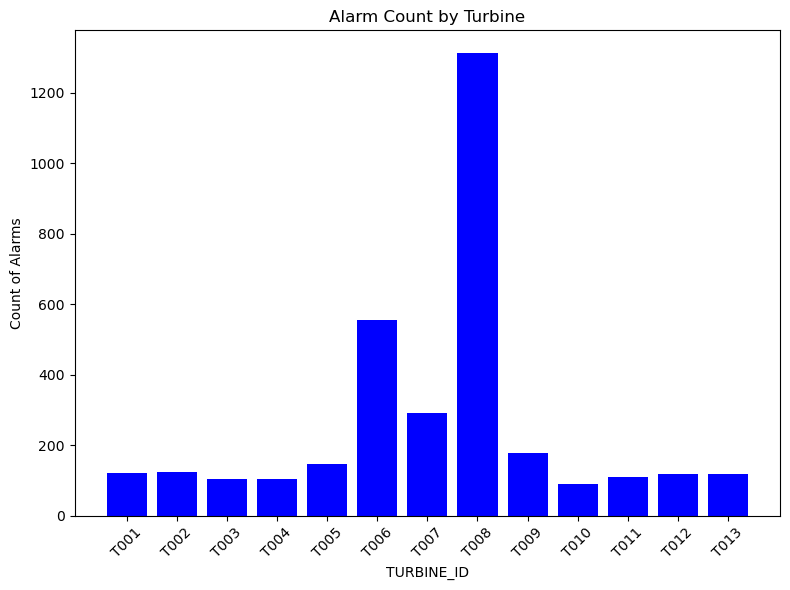

In [34]:
# Create a new DataFrame with the count of alarms per 'TURBINE_ID'
# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(alarm_counts['TURBINE_ID'], alarm_counts['AlarmCount'], color='blue')

# Customize the plot
plt.title('Alarm Count by Turbine')
plt.xlabel('TURBINE_ID')
plt.ylabel('Count of Alarms')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()